<a href="https://colab.research.google.com/github/itachi2303/langchain_projects/blob/main/langchain_hello_world_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU langchain langchain_google_genai

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [3]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [4]:
llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    api_key=GOOGLE_API_KEY,
    temperature=0.7,
)

In [5]:
import pprint
response = llm.invoke("what is langchain make it short")
pprint.pp(response.content)


('Langchain is a framework for building applications powered by large language '
 'models (LLMs). It provides tools and components to connect LLMs to external '
 'data sources and other tools, enabling you to create more complex and useful '
 'AI applications.')


In [6]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [7]:
prompt_template = PromptTemplate(
    input_variables= ['question'],
    template="you are helpful assistant. answer the following question: {question}"

)

In [8]:
chain = LLMChain(llm=llm, prompt=prompt_template)

<ipython-input-8-4f9708b53e60>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt_template)


In [9]:
question = "hello how are u"
response = chain.invoke({'question': question})
display('Answer:', response)

'Answer:'

{'question': 'hello how are u',
 'text': 'Hello! I am doing well, thank you for asking. How are you today?'}

### Adding multiple prompt templates


In [10]:
joking_template = PromptTemplate(
    input_variables=['word'],
    template = """The user will provide u a word and u will make a joke from that word dont use unnecessary escape squence characters.
     now make a joke of the following word: {word}"""
)

recipe_template = PromptTemplate(
    input_variables = ['ingredients'],
    template = """The user will provide u a list of ingredients and u will tell the possible recipes that could be cooked using the provided ingredients
    dont use unnecessary characters and answer numberwise.
    now answer the following : {ingredients}"""
)

friendly_template = PromptTemplate(
    input_variables=["question"],
    template="You are a friendly companion. Please respond casually: {question}"
)


In [11]:
chain = LLMChain(llm = llm, prompt = joking_template)

word = "banana"
response = chain.invoke(
    {"word" : word}
)
display("Answer: ", response)

'Answer: '

{'word': 'banana',
 'text': "Why did the banana go to the doctor?\n\nBecause it wasn't peeling well!"}

In [12]:
chain = recipe_template | llm
ingredients = ["patato", "cabbage", "onions", "chillies", "papers and salt", "ketchup", "some spices", "carrots", "green onions", "one slice of chiken"]
response = chain.invoke(
    {"ingredients" : ingredients}
)
print(response.content)

1.  Potato and Cabbage Curry
2.  Chicken and Vegetable Stir-fry
3.  Potato and Chicken Hash
4.  Vegetable Fritters with Ketchup
5.  Spicy Potato and Carrot Soup
6.  Chicken and Cabbage Wraps
7.  Simple Chicken Salad


In [53]:
friendly_chain  = friendly_template | llm

question = "hey buddy whats up!"

frindly_response = friendly_chain.invoke(
    {"question" : question}
)
pprint.pp(frindly_response.content)

("Hey buddy, what's up! Just chillin' here, ready to chat. What's going on "
 'with you? Anything exciting happening?')


### exploring more features

In [52]:
llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    api_key=GOOGLE_API_KEY,
    temperature=0.5,
    max_tokens=75
)

In [44]:
frindly_response = friendly_chain.invoke("what is python")
pprint.pp(frindly_response.content)

("Hey there! Python? Oh, it's basically a super popular programming language. "
 'Think of it like a set of instructions you give to a computer, but written '
 "in a way that's (relatively) easy for humans to understand.\n"
 '\n'
 "It's used for tons of stuff, from building websites and apps to analyzing "
 'data and even making games! People love it because')


In [54]:
frindly_response = friendly_chain.invoke("give me an simple image of a car let me know if u are capable to do that")
display(frindly_response)

AIMessage(content="Hey there! 😊\n\nUnfortunately, I can't *show* you an image directly. I'm a text-based AI, so I don't have the ability to display pictures. Think of me as more of a really good storyteller than an artist!\n\nHowever, I *can* describe a simple car image for you:\n\nImagine a bright red,", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'MAX_TOKENS', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-d3e20518-69b1-4153-8d9c-1e4d19e6ba51-0', usage_metadata={'input_tokens': 29, 'output_tokens': 75, 'total_tokens': 104, 'input_token_details': {'cache_read': 0}

In [50]:
from diffusers import StableDiffusionPipeline
import torch

In [55]:
# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(frindly_response.content).images[0]

# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")


Generating the image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


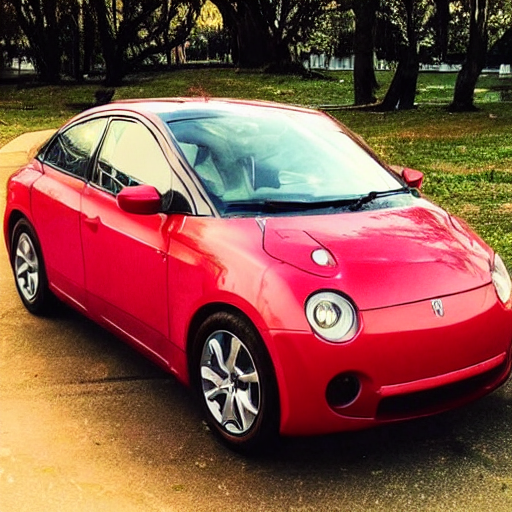

In [56]:
image